# Análisis y Visualización de Datos 

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn 

seaborn.set_context('talk')
# Set float format
pd.set_option('display.float_format','{:.2f}'.format)

# Set style
seaborn.set_style("darkgrid")
seaborn.set_palette('pastel')
seaborn.set_context("paper", rc={"font.size":12,"axes.titlesize":12,"axes.labelsize":12}) 

In [2]:
# TODO: cargar en git el csv
# TODO: reducir el dataset para test
filename = 'dataset100mil.csv'
df = pd.read_csv(filename)

C:\Users\Usuario\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

,Unnamed: 0,id,id_equipo,id_tanque,volumen,temperatura,codigo,vbat1,vbat2,fuel_level_dmm,...,current_firmware,id_canal,id_industria,industria,capacidad,alarma,nombre_producto,coef_var_vol,density,timestamp
0,0,47936,430,964,17143.94,25.00,N1,67,357,9217.00,...,V61005a1b2e477d,4,1.00,Transportation,50191.00,0.00,Product 1,0.00,nan,2021-01-01 00:00:46
1,1,1906999,477,1014,16200.70,26.10,N1,67,304,15727.00,...,V60603bQ74df1d3,4,6.00,Service Station,21259.00,1.00,Formula Diesel,0.00,nan,2021-01-01 00:00:24
2,2,1907000,477,1013,11265.10,25.70,N1,66,297,11579.00,...,V60603bQ74df1d3,4,6.00,Service Station,15032.00,1.00,VP Diesel,0.00,0.00,2021-01-01 00:00:31
3,3,1907001,477,1010,865.65,24.80,N1,66,302,1865.00,...,V60603bQ74df1d3,4,6.00,Service Station,15032.00,1.00,VP Nafta,0.00,0.00,2021-01-01 00:00:38
4,4,1907002,477,1011,1929.49,26.00,N1,61,272,3255.00,...,V60603bQ74df1d3,4,6.00,Service Station,15032.00,1.00,Super,0.00,nan,2021-01-01 00:00:41


In [4]:
len(df)

99999

In [5]:
df.dtypes

Unnamed: 0            int64
id                    int64
id_equipo             int64
id_tanque             int64
volumen             float64
temperatura         float64
codigo               object
vbat1                 int64
vbat2                 int64
fuel_level_dmm      float64
water_level_dmm     float64
water_volume_lts    float64
producto              int64
temp5                object
temp4                object
temp3               float64
temp2               float64
temp1               float64
id_empresa            int64
current_firmware     object
id_canal              int64
id_industria        float64
industria            object
capacidad           float64
alarma              float64
nombre_producto      object
coef_var_vol        float64
density             float64
timestamp            object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        99999 non-null  int64  
 1   id                99999 non-null  int64  
 2   id_equipo         99999 non-null  int64  
 3   id_tanque         99999 non-null  int64  
 4   volumen           99999 non-null  float64
 5   temperatura       99999 non-null  float64
 6   codigo            99999 non-null  object 
 7   vbat1             99999 non-null  int64  
 8   vbat2             99999 non-null  int64  
 9   fuel_level_dmm    98871 non-null  float64
 10  water_level_dmm   98871 non-null  float64
 11  water_volume_lts  98871 non-null  float64
 12  producto          99999 non-null  int64  
 13  temp5             60984 non-null  object 
 14  temp4             60984 non-null  object 
 15  temp3             60984 non-null  float64
 16  temp2             60984 non-null  float6

In [7]:
df.describe().round()

,Unnamed: 0,id,id_equipo,id_tanque,volumen,temperatura,vbat1,vbat2,fuel_level_dmm,water_level_dmm,...,temp3,temp2,temp1,id_empresa,id_canal,id_industria,capacidad,alarma,coef_var_vol,density
count,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,99999.00,98871.00,98871.00,...,60984.00,60984.00,57654.00,99999.00,99999.00,99921.00,99954.00,99954.00,97989.00,58168.00
mean,49999.00,925399.00,622.00,65709.00,9461.00,27.00,60.00,301.00,9228.00,13.00,...,-9.00,-12.00,-35.00,512.00,6.00,5.00,19754.00,1.00,0.00,0.00
std,28867.00,1204869.00,213.00,48513.00,8839.00,5.00,8.00,35.00,5799.00,46.00,...,42.00,43.00,37.00,456.00,3.00,3.00,14108.00,0.00,0.00,0.00
min,0.00,111.00,106.00,75.00,0.00,-57.00,0.00,0.00,0.00,0.00,...,-57.00,-57.00,-57.00,23.00,2.00,0.00,150.00,0.00,0.00,0.00
25%,25000.00,87510.00,477.00,1014.00,3102.00,25.00,56.00,280.00,5042.00,0.00,...,-57.00,-57.00,-57.00,100.00,4.00,1.00,10330.00,0.00,0.00,0.00
50%,49999.00,341151.00,569.00,101490.00,7505.00,26.00,61.00,304.00,8458.00,0.00,...,26.00,23.00,-56.00,211.00,4.00,6.00,20000.00,1.00,0.00,0.00
75%,74998.00,1861970.00,851.00,102267.00,14034.00,28.00,66.00,315.00,13196.00,0.00,...,28.00,29.00,-56.00,1066.00,7.00,6.00,21259.00,1.00,0.00,1.00
max,99998.00,3772363.00,909.00,102711.00,91885.00,51.00,81.00,367.00,38130.00,649.00,...,57.00,54.00,56.00,1132.00,21.00,10.00,102070.00,1.00,0.00,1.00


## Volumen ##

In [8]:
df.volumen.describe().round()

count   99999.00
mean     9461.00
std      8839.00
min         0.00
25%      3102.00
50%      7505.00
75%     14034.00
max     91885.00
Name: volumen, dtype: float64

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


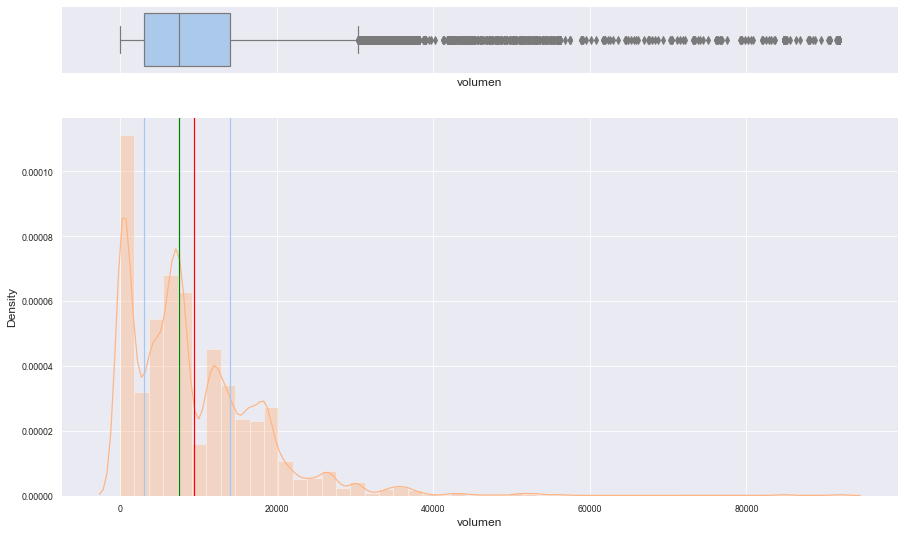

In [9]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(15,9),gridspec_kw={"height_ratios": (.15, .85)})
 
seaborn.boxplot(df.volumen, ax=ax_box)
seaborn.distplot(df.volumen, ax=ax_hist, kde=False, hist=False)
seaborn.distplot(df.volumen, ax=ax_hist, kde=True, hist=True,norm_hist=False)

plt.axvline(df.volumen.quantile(0.25))
plt.axvline(df.volumen.quantile(0.50),color='g')
plt.axvline(df.volumen.quantile(0.75))
plt.ticklabel_format(style='plain', axis='x') 
plt.axvline(df.volumen.mean(),color='red') 
ax_box.set_title
plt.show()

In [10]:
q1=df.volumen.quantile(0.25)
q3=df.volumen.quantile(0.75)
RI=q3-q1
min=q1-1.5*RI
max=q3+1.5*RI
print("Límite inferior =", min)
print("Límite superior =", max)

Límite inferior = -13296.356250000003
Límite superior = 30432.309750000004


## Capacidad ##

In [11]:
df["capacidad"].describe()## ver si se puede saber la capacidad mínima y máxima real de los tanques

count    99954.00
mean     19754.05
std      14108.22
min        150.00
25%      10330.00
50%      20000.00
75%      21259.00
max     102070.00
Name: capacidad, dtype: float64

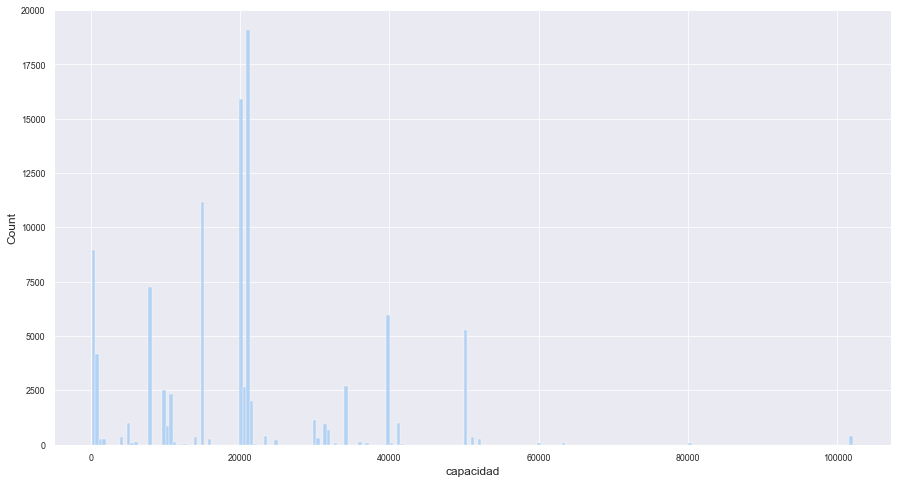

In [12]:
plt.figure(figsize=(15, 8))
seaborn.histplot(x=df.capacidad)
plt.ticklabel_format(style='plain', axis='x') 

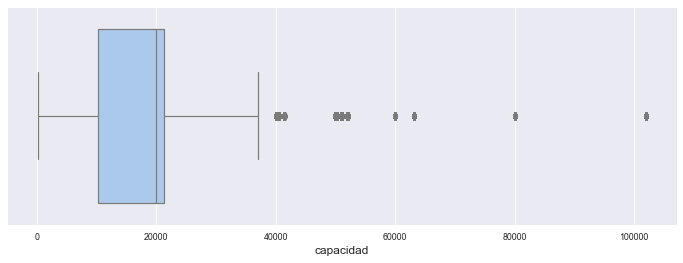

In [13]:
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df.capacidad)
plt.ticklabel_format(style='plain', axis='x') 

In [14]:
q1=df.capacidad.quantile(0.25)
q3=df.capacidad.quantile(0.75)
RI=q3-q1
min=q1-1.5*RI
max=q3+1.5*RI
print("Límite inferior =", min)
print("Límite superior =", max)

Límite inferior = -6063.5
Límite superior = 37652.5


## Tanque ##

In [15]:
df["id_tanque"].value_counts() #Eliminar los que tienen pocos registros## ver criterio

102490    3786
102489    3482
1011      3429
1014      3330
102645    2696
          ... 
112         20
101292      10
582          5
101612       3
102073       1
Name: id_tanque, Length: 325, dtype: int64

In [16]:
df["id_tanque"].value_counts().min(), df["id_tanque"].value_counts().max()

(1, 3786)

## Temperatura ##

In [17]:
df.temperatura.describe()##Eliminar registros con valores de temperatura negativos? relacionar con volumen

count   99999.00
mean       26.61
std         5.31
min       -56.60
25%        25.10
50%        26.50
75%        28.00
max        51.00
Name: temperatura, dtype: float64

<AxesSubplot:xlabel='temperatura', ylabel='Count'>

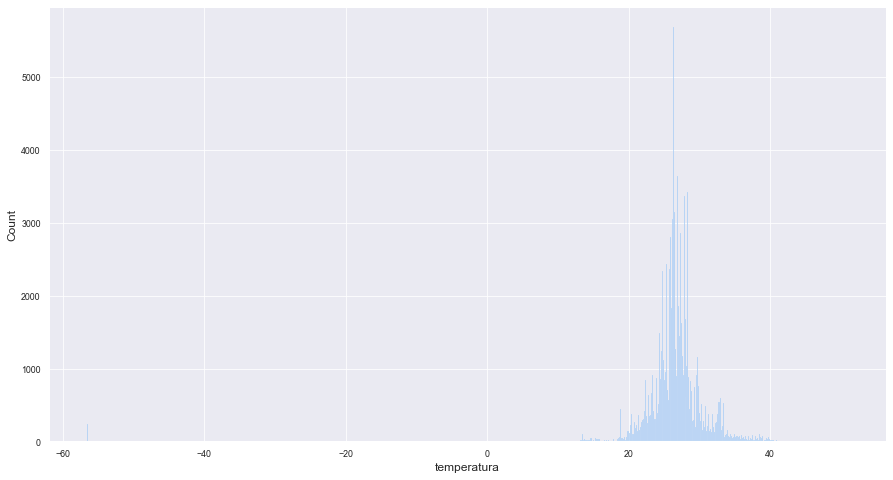

In [18]:
plt.figure(figsize=(15, 8))
seaborn.histplot(x=df.temperatura)


In [19]:
df_sample=df.sample(500)
df_sample[:10]

,Unnamed: 0,id,id_equipo,id_tanque,volumen,temperatura,codigo,vbat1,vbat2,fuel_level_dmm,...,current_firmware,id_canal,id_industria,industria,capacidad,alarma,nombre_producto,coef_var_vol,density,timestamp
51167,51167,93652,900,102643,12157.90,26.40,N1,67,312,12717.00,...,V71107WFc20d77c,7,6.00,Service Station,21250.00,1.00,VP Diesel,0.00,0.85,2021-01-02 04:02:29
1710,1710,1907478,477,1013,11265.10,25.70,N1,66,297,11579.00,...,V60603bQ74df1d3,4,6.00,Service Station,15032.00,1.00,VP Diesel,0.00,0.00,2021-01-01 02:19:31
56093,56093,1586294,357,763,4113.60,27.10,V1,60,285,5510.00,...,V50403bQb1bdf68,7,6.00,Service Station,20000.00,0.00,Super,0.00,nan,2021-01-02 07:40:01
82181,82181,3732278,248,422,4963.50,27.00,V1,60,298,7460.00,...,V50403bQb1bdf68,4,6.00,Service Station,10671.00,1.00,Super,0.00,nan,2021-01-02 15:58:44
29896,29896,615608,578,101199,35655.42,25.40,N1,60,247,21396.00,...,V60403bQ4830361,4,7.00,Construction,40481.00,0.00,Gasoil Grado 2 800060,0.00,0.00,2021-01-01 18:30:03
58211,58211,334391,883,102489,7920.68,28.00,V1,56,316,12632.00,...,V71106WFc828353,10,1.00,Transportation,8100.00,0.00,DIESEL,0.00,0.00,2021-01-02 08:23:42
95760,95760,68902,619,101294,20973.00,28.10,V1,60,284,20973.00,...,V60403bQ4830361,2,4.00,Agriculture,50000.00,0.00,Product 1,0.00,0.00,2021-01-02 19:38:35
32569,32569,90245,900,102643,12156.77,26.40,N1,67,311,12716.00,...,V71107WFc20d77c,7,6.00,Service Station,21250.00,1.00,VP Diesel,0.00,0.85,2021-01-01 18:26:24
85433,85433,340688,883,102490,7259.77,32.90,V1,55,316,11817.00,...,V71106WFc828353,10,1.00,Transportation,7800.00,0.00,DIESEL,0.00,0.00,2021-01-02 15:42:29
60501,60501,334478,883,102490,7801.49,28.30,L1,55,316,13625.00,...,V71106WFc828353,10,1.00,Transportation,7800.00,0.00,DIESEL,0.00,0.00,2021-01-02 08:30:54


<AxesSubplot:xlabel='temperatura', ylabel='volumen'>

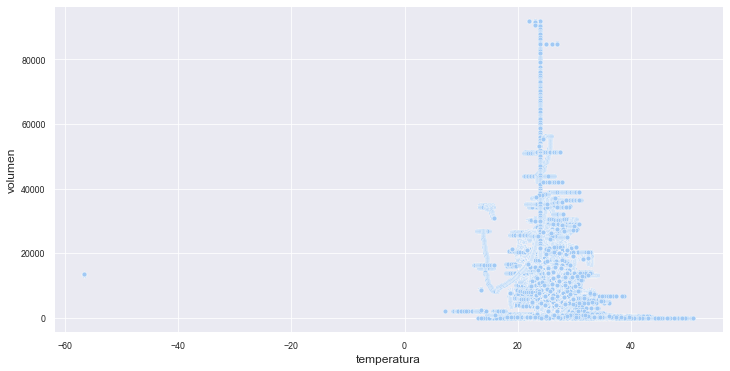

In [78]:
plt.figure(figsize=(12,6))
seaborn.scatterplot(data=df, x="temperatura", y="volumen")

In [21]:
temp_min=df.temperatura.min()##el registro de temperatura es independiente del del volumen
df_fil=df[df["temperatura"]==temp_min]
df_fil[:10]

,Unnamed: 0,id,id_equipo,id_tanque,volumen,temperatura,codigo,vbat1,vbat2,fuel_level_dmm,...,current_firmware,id_canal,id_industria,industria,capacidad,alarma,nombre_producto,coef_var_vol,density,timestamp
269,269,424389,646,101418,13424.56,-56.60,N1,66,238,20157.00,...,V60403bQ72c8689,4,1.00,Transportation,50000.00,0.00,Gas Oil,0.00,0.00,2021-01-01 00:00:27
772,772,424391,646,101418,13427.23,-56.60,N1,66,237,20161.00,...,V60403bQ72c8689,4,1.00,Transportation,50000.00,0.00,Gas Oil,0.00,0.00,2021-01-01 00:30:10
777,777,424394,646,101418,13426.56,-56.60,N1,66,237,20160.00,...,V60403bQ72c8689,4,1.00,Transportation,50000.00,0.00,Gas Oil,0.00,0.00,2021-01-01 01:00:53
2318,2318,424395,646,101418,13427.23,-56.60,N1,66,238,20161.00,...,V60403bQ72c8689,4,1.00,Transportation,50000.00,0.00,Gas Oil,0.00,0.00,2021-01-01 01:30:36
2332,2332,424398,646,101418,13425.89,-56.60,N1,66,237,20159.00,...,V60403bQ72c8689,4,1.00,Transportation,50000.00,0.00,Gas Oil,0.00,0.00,2021-01-01 02:00:19
3730,3730,424399,646,101418,13426.56,-56.60,N1,66,237,20160.00,...,V60403bQ72c8689,4,1.00,Transportation,50000.00,0.00,Gas Oil,0.00,0.00,2021-01-01 02:30:02
3746,3746,424402,646,101418,13425.23,-56.60,N1,66,237,20158.00,...,V60403bQ72c8689,4,1.00,Transportation,50000.00,0.00,Gas Oil,0.00,0.00,2021-01-01 03:00:45
5354,5354,424403,646,101418,13424.56,-56.60,N1,66,237,20157.00,...,V60403bQ72c8689,4,1.00,Transportation,50000.00,0.00,Gas Oil,0.00,0.00,2021-01-01 03:30:28
5367,5367,424406,646,101418,13423.90,-56.60,N1,66,237,20156.00,...,V60403bQ72c8689,4,1.00,Transportation,50000.00,0.00,Gas Oil,0.00,0.00,2021-01-01 04:00:11
6790,6790,424408,646,101418,13423.90,-56.60,N1,66,237,20156.00,...,V60403bQ72c8689,4,1.00,Transportation,50000.00,0.00,Gas Oil,0.00,0.00,2021-01-01 04:30:53


## Fecha ##

In [22]:
df.timestamp.unique()

array(['2021-01-01 00:00:46', '2021-01-01 00:00:24',
       '2021-01-01 00:00:31', ..., '2021-01-02 21:33:44',
       '2021-01-02 21:34:02', '2021-01-02 21:34:10'], dtype=object)

In [141]:
df['fecha'] = pd.to_datetime(df.timestamp)

In [142]:
df.fecha

0       2021-01-01 00:00:46
1       2021-01-01 00:00:24
2       2021-01-01 00:00:31
3       2021-01-01 00:00:38
4       2021-01-01 00:00:41
                ...        
99994   2021-01-02 20:32:40
99995   2021-01-02 21:33:36
99996   2021-01-02 21:33:44
99997   2021-01-02 21:34:02
99998   2021-01-02 21:34:10
Name: fecha, Length: 99999, dtype: datetime64[ns]

In [157]:
fecha_period=df["fecha"].dt.to_period('M')
fecha_period

0        2021-01
1        2021-01
2        2021-01
3        2021-01
4        2021-01
          ...   
99994    2021-01
99995    2021-01
99996    2021-01
99997    2021-01
99998    2021-01
Name: fecha, Length: 99999, dtype: period[M]

In [158]:
fecha_period.sort_values()

0        2021-01
66670    2021-01
66669    2021-01
66668    2021-01
66667    2021-01
          ...   
33328    2021-01
33327    2021-01
33326    2021-01
33348    2021-01
99998    2021-01
Name: fecha, Length: 99999, dtype: period[M]

In [ ]:
df.timestamp

In [27]:
#plt.figure(figsize=(15, 8))
#seaborn.histplot(x=df.timestamp)

## Codigo ##

In [43]:
df.codigo.unique()

array(['N1', 'N2', 'F1', 'N0', 'V1', 'F0', 'm0', 'M1', 'F2', 'L1', 'V0',
       'I1', 'I2', 'V2', 'U2', 'U1', 'L2', 'P1', 'L0', 'T0', 'I0', 'T1',
       'P2'], dtype=object)

In [44]:
df.codigo.value_counts()

N1    47160
V1    25463
L1     9133
N2     9011
V2     3816
L2     1778
I1      804
V0      633
N0      567
U1      566
F1      350
F2      174
M1      165
m0       91
F0       91
P1       51
T1       46
U2       33
I2       28
I0       23
T0       10
L0        5
P2        1
Name: codigo, dtype: int64

In [50]:
##df["codico"].isin(["V0","N0","F0", "I0","T0","L0"])#ver valores asociados a código de error

In [52]:
df_fil_cod=df[df.codigo=="V0"]
df_fil_cod

,Unnamed: 0,id,id_equipo,id_tanque,volumen,temperatura,codigo,vbat1,vbat2,fuel_level_dmm,...,current_firmware,id_canal,id_industria,industria,capacidad,alarma,nombre_producto,coef_var_vol,density,timestamp
1964,1964,163165,400,976,170.40,24.30,V0,19,306,418.00,...,V50102b8,2,1.00,Transportation,40000.00,0.00,Formula Diesel,0.00,nan,2021-01-01 01:23:21
1965,1965,163166,400,976,170.40,24.30,V0,19,306,418.00,...,V50102b8,2,1.00,Transportation,40000.00,0.00,Formula Diesel,0.00,nan,2021-01-01 01:23:41
1973,1973,163170,400,976,170.40,24.30,V0,19,306,418.00,...,V50102b8,2,1.00,Transportation,40000.00,0.00,Formula Diesel,0.00,nan,2021-01-01 01:24:20
1982,1982,163172,400,976,170.40,24.30,V0,19,306,418.00,...,V50102b8,2,1.00,Transportation,40000.00,0.00,Formula Diesel,0.00,nan,2021-01-01 01:24:45
1984,1984,163173,400,976,170.40,24.30,V0,19,306,418.00,...,V50102b8,2,1.00,Transportation,40000.00,0.00,Formula Diesel,0.00,nan,2021-01-01 01:25:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80158,80158,165193,111,81,11125.44,28.00,V0,0,0,nan,...,NaN,4,1.00,Transportation,40000.00,1.00,BIO,0.00,0.00,2021-01-02 16:05:00
85499,85499,165195,111,81,11194.37,29.00,V0,0,0,nan,...,NaN,4,1.00,Transportation,40000.00,1.00,BIO,0.00,0.00,2021-01-02 16:24:00
85500,85500,165196,111,81,11159.81,29.00,V0,0,0,nan,...,NaN,4,1.00,Transportation,40000.00,1.00,BIO,0.00,0.00,2021-01-02 16:25:00
86663,86663,165197,111,81,11125.44,29.00,V0,0,0,nan,...,NaN,4,1.00,Transportation,40000.00,1.00,BIO,0.00,0.00,2021-01-02 16:38:00


In [53]:
#graficar volumen en funcion del codigo de error

## Baterias ##

In [54]:
df.vbat1.describe()

count   99999.00
mean       60.03
std         7.52
min         0.00
25%        56.00
50%        61.00
75%        66.00
max        81.00
Name: vbat1, dtype: float64

<AxesSubplot:xlabel='vbat1', ylabel='Count'>

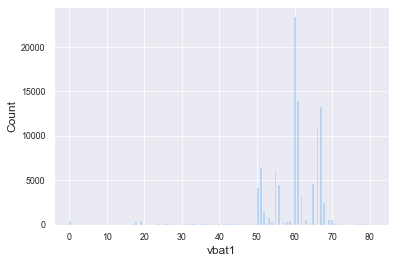

In [56]:
seaborn.histplot(df.vbat1)

In [61]:
vbat1_min=0
df_fil_bat=df[df["vbat1"]==vbat1_min]
df_fil_bat

,Unnamed: 0,id,id_equipo,id_tanque,volumen,temperatura,codigo,vbat1,vbat2,fuel_level_dmm,...,current_firmware,id_canal,id_industria,industria,capacidad,alarma,nombre_producto,coef_var_vol,density,timestamp
272,272,345215,106,75,0.00,30.70,N0,0,0,nan,...,NaN,2,1.00,Transportation,4096.00,1.00,Product 2,0.00,nan,2021-01-01 00:00:00
728,728,345216,106,75,0.00,30.50,N0,0,0,nan,...,NaN,2,1.00,Transportation,4096.00,1.00,Product 2,0.00,nan,2021-01-01 00:10:00
730,730,345217,106,75,0.00,30.20,N0,0,0,nan,...,NaN,2,1.00,Transportation,4096.00,1.00,Product 2,0.00,nan,2021-01-01 00:20:00
736,736,345218,106,75,0.00,30.20,N0,0,0,nan,...,NaN,2,1.00,Transportation,4096.00,1.00,Product 2,0.00,nan,2021-01-01 00:30:00
737,737,345219,106,75,0.00,30.00,N0,0,0,nan,...,NaN,2,1.00,Transportation,4096.00,1.00,Product 2,0.00,nan,2021-01-01 00:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98251,98251,345481,106,75,0.00,38.80,N0,0,0,nan,...,NaN,2,1.00,Transportation,4096.00,1.00,Product 2,0.00,nan,2021-01-02 20:20:00
98256,98256,345482,106,75,0.00,38.20,N0,0,0,nan,...,NaN,2,1.00,Transportation,4096.00,1.00,Product 2,0.00,nan,2021-01-02 20:30:00
98261,98261,345483,106,75,0.00,37.90,N0,0,0,nan,...,NaN,2,1.00,Transportation,4096.00,1.00,Product 2,0.00,nan,2021-01-02 20:40:00
98265,98265,345484,106,75,0.00,37.70,N0,0,0,nan,...,NaN,2,1.00,Transportation,4096.00,1.00,Product 2,0.00,nan,2021-01-02 20:50:00


In [63]:
df_fil_bat.describe()

,Unnamed: 0,id,id_equipo,id_tanque,volumen,temperatura,vbat1,vbat2,fuel_level_dmm,water_level_dmm,...,temp3,temp2,temp1,id_empresa,id_canal,id_industria,capacidad,alarma,coef_var_vol,density
count,370.00,370.00,370.00,370.00,370.00,370.00,370.00,370.00,0.00,0.00,...,0.00,0.00,0.00,370.00,370.00,370.00,370.00,370.00,370.00,99.00
mean,43039.18,297134.59,107.34,76.61,3150.74,33.17,0.00,0.00,nan,nan,...,nan,nan,nan,27.73,2.54,1.00,13702.75,1.00,0.00,0.00
std,27261.99,79880.49,2.22,2.66,5226.51,6.02,0.00,0.00,nan,nan,...,nan,nan,nan,0.44,0.89,0.00,15915.89,0.00,0.00,0.00
min,272.00,165102.00,106.00,75.00,0.00,21.00,0.00,0.00,nan,nan,...,nan,nan,nan,27.00,2.00,1.00,4096.00,1.00,0.00,0.00
25%,21384.25,165194.25,106.00,75.00,0.00,28.00,0.00,0.00,nan,nan,...,nan,nan,nan,27.00,2.00,1.00,4096.00,1.00,0.00,0.00
50%,40227.50,345300.50,106.00,75.00,0.00,32.40,0.00,0.00,nan,nan,...,nan,nan,nan,28.00,2.00,1.00,4096.00,1.00,0.00,0.00
75%,65385.75,345392.75,111.00,81.00,11159.81,39.00,0.00,0.00,nan,nan,...,nan,nan,nan,28.00,4.00,1.00,40000.00,1.00,0.00,0.00
max,98270.00,345485.00,111.00,81.00,12540.29,43.40,0.00,0.00,nan,nan,...,nan,nan,nan,28.00,4.00,1.00,40000.00,1.00,0.00,0.00


In [55]:
df.vbat2.describe()

count   99999.00
mean      301.44
std        35.34
min         0.00
25%       280.00
50%       304.00
75%       315.00
max       367.00
Name: vbat2, dtype: float64

<AxesSubplot:xlabel='vbat2', ylabel='Count'>

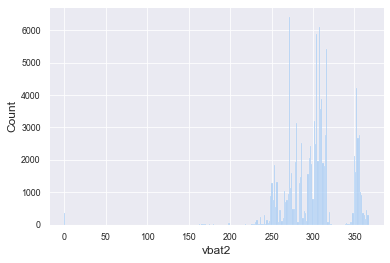

In [57]:
seaborn.histplot(df.vbat2)

In [62]:
vbat2_min=0
df_fil_bat2=df[df["vbat2"]==vbat2_min]
df_fil_bat2

,Unnamed: 0,id,id_equipo,id_tanque,volumen,temperatura,codigo,vbat1,vbat2,fuel_level_dmm,...,current_firmware,id_canal,id_industria,industria,capacidad,alarma,nombre_producto,coef_var_vol,density,timestamp
272,272,345215,106,75,0.00,30.70,N0,0,0,nan,...,NaN,2,1.00,Transportation,4096.00,1.00,Product 2,0.00,nan,2021-01-01 00:00:00
728,728,345216,106,75,0.00,30.50,N0,0,0,nan,...,NaN,2,1.00,Transportation,4096.00,1.00,Product 2,0.00,nan,2021-01-01 00:10:00
730,730,345217,106,75,0.00,30.20,N0,0,0,nan,...,NaN,2,1.00,Transportation,4096.00,1.00,Product 2,0.00,nan,2021-01-01 00:20:00
736,736,345218,106,75,0.00,30.20,N0,0,0,nan,...,NaN,2,1.00,Transportation,4096.00,1.00,Product 2,0.00,nan,2021-01-01 00:30:00
737,737,345219,106,75,0.00,30.00,N0,0,0,nan,...,NaN,2,1.00,Transportation,4096.00,1.00,Product 2,0.00,nan,2021-01-01 00:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98251,98251,345481,106,75,0.00,38.80,N0,0,0,nan,...,NaN,2,1.00,Transportation,4096.00,1.00,Product 2,0.00,nan,2021-01-02 20:20:00
98256,98256,345482,106,75,0.00,38.20,N0,0,0,nan,...,NaN,2,1.00,Transportation,4096.00,1.00,Product 2,0.00,nan,2021-01-02 20:30:00
98261,98261,345483,106,75,0.00,37.90,N0,0,0,nan,...,NaN,2,1.00,Transportation,4096.00,1.00,Product 2,0.00,nan,2021-01-02 20:40:00
98265,98265,345484,106,75,0.00,37.70,N0,0,0,nan,...,NaN,2,1.00,Transportation,4096.00,1.00,Product 2,0.00,nan,2021-01-02 20:50:00


In [65]:
df_fil_bat2.describe()

,Unnamed: 0,id,id_equipo,id_tanque,volumen,temperatura,vbat1,vbat2,fuel_level_dmm,water_level_dmm,...,temp3,temp2,temp1,id_empresa,id_canal,id_industria,capacidad,alarma,coef_var_vol,density
count,370.00,370.00,370.00,370.00,370.00,370.00,370.00,370.00,0.00,0.00,...,0.00,0.00,0.00,370.00,370.00,370.00,370.00,370.00,370.00,99.00
mean,43039.18,297134.59,107.34,76.61,3150.74,33.17,0.00,0.00,nan,nan,...,nan,nan,nan,27.73,2.54,1.00,13702.75,1.00,0.00,0.00
std,27261.99,79880.49,2.22,2.66,5226.51,6.02,0.00,0.00,nan,nan,...,nan,nan,nan,0.44,0.89,0.00,15915.89,0.00,0.00,0.00
min,272.00,165102.00,106.00,75.00,0.00,21.00,0.00,0.00,nan,nan,...,nan,nan,nan,27.00,2.00,1.00,4096.00,1.00,0.00,0.00
25%,21384.25,165194.25,106.00,75.00,0.00,28.00,0.00,0.00,nan,nan,...,nan,nan,nan,27.00,2.00,1.00,4096.00,1.00,0.00,0.00
50%,40227.50,345300.50,106.00,75.00,0.00,32.40,0.00,0.00,nan,nan,...,nan,nan,nan,28.00,2.00,1.00,4096.00,1.00,0.00,0.00
75%,65385.75,345392.75,111.00,81.00,11159.81,39.00,0.00,0.00,nan,nan,...,nan,nan,nan,28.00,4.00,1.00,40000.00,1.00,0.00,0.00
max,98270.00,345485.00,111.00,81.00,12540.29,43.40,0.00,0.00,nan,nan,...,nan,nan,nan,28.00,4.00,1.00,40000.00,1.00,0.00,0.00


## Correlación entre variables numéricas ##

In [66]:
fil_cor=df.corr(method="spearman")
fil_cor

,Unnamed: 0,id,id_equipo,id_tanque,volumen,temperatura,vbat1,vbat2,fuel_level_dmm,water_level_dmm,...,temp3,temp2,temp1,id_empresa,id_canal,id_industria,capacidad,alarma,coef_var_vol,density
Unnamed: 0,1.00,0.13,0.03,0.03,0.08,0.24,-0.06,-0.01,0.11,-0.03,...,0.18,0.18,0.03,-0.01,0.14,-0.15,-0.04,-0.14,0.04,-0.10
id,0.13,1.00,-0.69,-0.67,0.10,0.07,0.05,-0.64,0.14,0.01,...,0.19,0.28,-0.04,-0.54,-0.15,-0.01,0.04,-0.07,0.13,-0.37
id_equipo,0.03,-0.69,1.00,0.97,-0.11,0.08,0.06,0.57,-0.04,0.04,...,-0.07,-0.07,0.07,0.73,0.44,-0.01,-0.13,-0.06,-0.23,0.48
id_tanque,0.03,-0.67,0.97,1.00,-0.08,0.08,0.10,0.56,-0.04,0.02,...,-0.05,-0.03,0.07,0.76,0.45,-0.05,-0.07,-0.13,-0.19,0.52
volumen,0.08,0.10,-0.11,-0.08,1.00,-0.09,0.32,-0.16,0.91,-0.25,...,0.33,0.47,0.09,0.09,0.15,-0.49,0.67,-0.23,0.06,-0.15
temperatura,0.24,0.07,0.08,0.08,-0.09,1.00,-0.28,0.12,0.03,0.12,...,0.30,0.24,0.25,0.06,0.24,0.02,-0.30,-0.14,0.02,-0.09
vbat1,-0.06,0.05,0.06,0.10,0.32,-0.28,1.00,-0.01,0.23,-0.25,...,0.00,0.17,-0.16,0.32,0.18,-0.25,0.55,0.09,-0.18,0.41
vbat2,-0.01,-0.64,0.57,0.56,-0.16,0.12,-0.01,1.00,-0.16,-0.01,...,0.10,-0.01,0.29,0.41,0.27,-0.03,-0.16,0.05,-0.07,0.19
fuel_level_dmm,0.11,0.14,-0.04,-0.04,0.91,0.03,0.23,-0.16,1.00,-0.22,...,0.38,0.46,0.07,0.07,0.17,-0.42,0.42,-0.22,0.05,-0.12
water_level_dmm,-0.03,0.01,0.04,0.02,-0.25,0.12,-0.25,-0.01,-0.22,1.00,...,-0.14,-0.29,0.09,0.01,-0.01,0.30,-0.19,-0.02,0.04,-0.22


<AxesSubplot:>

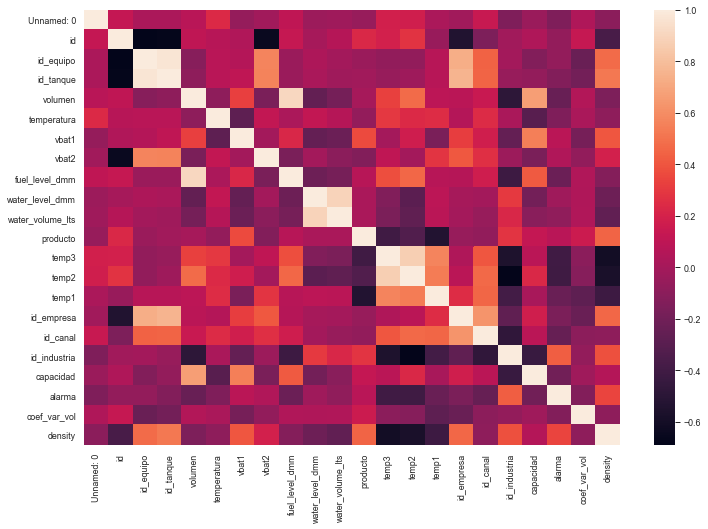

In [159]:
plt.figure(figsize=(12,8))
seaborn.heatmap(fil_cor)

In [74]:
fil_cor_max=fil_cor[fil_cor>0.7]
fil_cor_max

,Unnamed: 0,id,id_equipo,id_tanque,volumen,temperatura,vbat1,vbat2,fuel_level_dmm,water_level_dmm,...,temp3,temp2,temp1,id_empresa,id_canal,id_industria,capacidad,alarma,coef_var_vol,density
Unnamed: 0,1.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
id,nan,1.00,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
id_equipo,nan,nan,1.00,0.97,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,0.73,nan,nan,nan,nan,nan,nan
id_tanque,nan,nan,0.97,1.00,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,0.76,nan,nan,nan,nan,nan,nan
volumen,nan,nan,nan,nan,1.00,nan,nan,nan,0.91,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
temperatura,nan,nan,nan,nan,nan,1.00,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
vbat1,nan,nan,nan,nan,nan,nan,1.00,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
vbat2,nan,nan,nan,nan,nan,nan,nan,1.00,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
fuel_level_dmm,nan,nan,nan,nan,0.91,nan,nan,nan,1.00,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
water_level_dmm,nan,nan,nan,nan,nan,nan,nan,nan,nan,1.00,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


<AxesSubplot:xlabel='fuel_level_dmm', ylabel='Count'>

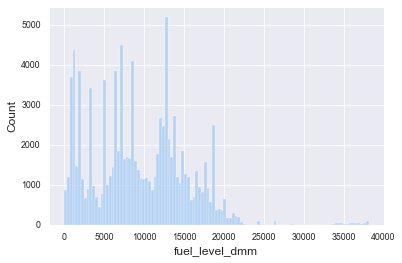

In [75]:
seaborn.histplot(df.fuel_level_dmm)

<AxesSubplot:xlabel='fuel_level_dmm', ylabel='volumen'>

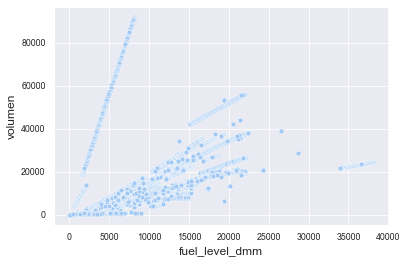

In [76]:
seaborn.scatterplot(data=df, x="fuel_level_dmm", y="volumen")

In [28]:
##Plantear condiciones
#cond_1= df["volumen"] < df["capacidad"].max()


## Agrupaciones ##

<AxesSubplot:xlabel='id_tanque', ylabel='volumen'>

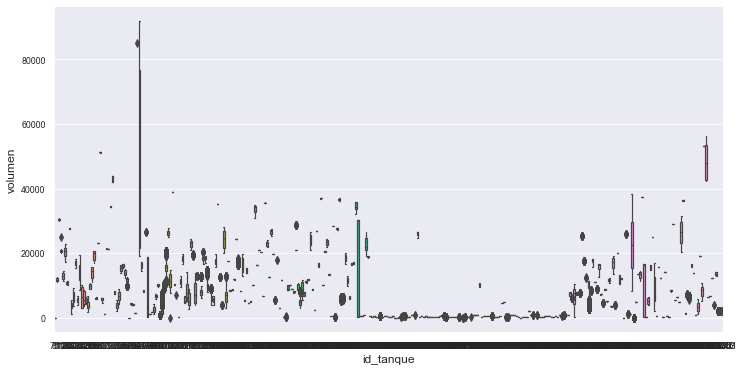

In [89]:
plt.figure(figsize=(12,6))
seaborn.boxplot(data=df, x="id_tanque", y="volumen")

<AxesSubplot:xlabel='id_equipo', ylabel='volumen'>

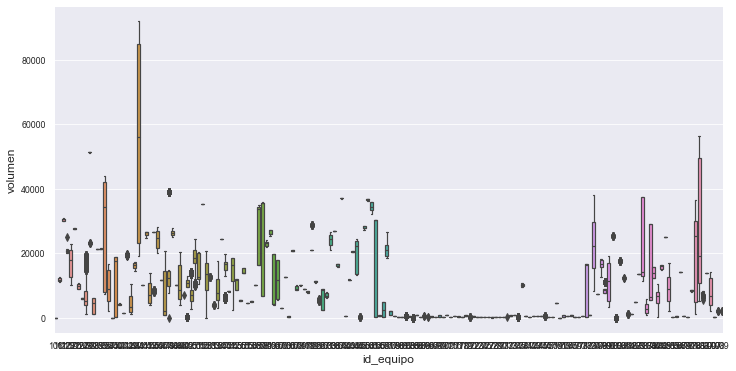

In [88]:
plt.figure(figsize=(12,6))
seaborn.boxplot(data=df, x="id_equipo", y="volumen")

In [137]:
df_vol_ind=df[["volumen", "industria"]].groupby("industria").agg({"volumen":["mean", "median", "count"]})
df_vol_ind

volumen                
                    mean   median  count
industria                               
Agriculture     17731.24 17069.96   2428
Construction    16961.08 21363.50   2106
Industry        19534.76 20293.28    412
Mining          23086.03 21392.53   1238
Oil&Gas         24443.86 13845.94   1458
Public          10200.69 10192.03     91
Service Station  8781.25  6760.00  51867
Telcos            313.78   188.28  13507
Transportation  12487.13 10085.92  26555

In [138]:
df_vol_ind.columns = df_vol_ind.columns.droplevel(level=0)
df_vol_ind.sort_values(by='median',ascending=False)

,mean,median,count
industria,,,
Mining,23086.03,21392.53,1238
Construction,16961.08,21363.50,2106
Industry,19534.76,20293.28,412
Agriculture,17731.24,17069.96,2428
Oil&Gas,24443.86,13845.94,1458
Public,10200.69,10192.03,91
Transportation,12487.13,10085.92,26555
Service Station,8781.25,6760.00,51867
Telcos,313.78,188.28,13507


<AxesSubplot:xlabel='industria', ylabel='volumen'>

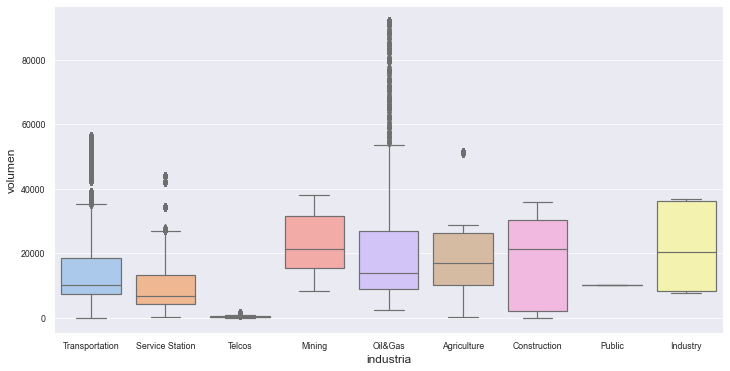

In [90]:
plt.figure(figsize=(12,6))
seaborn.boxplot(data=df, x="industria", y="volumen")

In [139]:
df_vol_pro=df[["volumen", "nombre_producto"]].groupby("nombre_producto").agg({"volumen":["mean", "median", "count"]})
df_vol_pro

volumen                
                          mean   median  count
nombre_producto                               
Aceite                 1308.34  1319.25    101
B100                    440.22   372.15    464
BIO                    6881.33 10108.56    616
D500                  15051.78 15963.60   1201
DIESEL                10706.95  7698.56   8097
DIESEL EURO            8467.26  8605.13    101
Diesel                 5159.61   329.10  11580
Diesel 500            15204.33 15120.44  10075
Diesel Comun          10063.65 10063.82     54
EURO                  13028.46 13143.40    120
Euro                   6960.98  4572.25    260
Euro Diesel           30956.51 41942.54    135
Euro-Diesel           23063.93 23080.23      5
Formula               18420.36 12543.84    439
Formula Diesel        10153.56 13103.12  11156
GAS OIL               27119.46 27717.46    228
GASOIL                18190.47 18717.02   1820
Gas Oil               22835.16 23421.76   2550
Gas Oil Comun Gr 2    17549.94 10103.84    286
Gas Oil Comun Gr 2     1959.63  1968.58    101
Gas Oil Euro Gr 3      6850.88  5667.12    215
Gas Oil Grado 2        8551.12  5408.45    246
Gas Oil Grado 3       21198.88 21203.88     67
Gasoil                17472.43 20495.98    639
Gasoil Grado 2 800060 35631.70 35628.89     92
Gasoil Grado 3 800059  6782.05  6780.37     46
Gasoil grado 2        23411.89 20502.85    308
Infinia                 604.63   604.55     91
Infinia Diesel         9627.06  6520.75   2705
Infinia Diésel        10200.69 10192.03     91
Infinia Nafta          7827.70  8240.70   2745
Kerosene               7808.54  7938.82    148
Nafta Super            7797.67  6251.09   8587
Nafta V-Power          1104.58  1060.15    135
Premium                5159.47  5147.26     89
Product 1             13673.26 10841.28   3430
Product 2             14276.20 16592.65   3022
Producto 0            13365.99  8005.22    427
Producto 1              438.56   107.10   3380
Quantum Diesel        11017.21 11016.46     83
Quantum Nafta          7635.46  7666.65     96
S1002050010           10952.02 10946.25    184
Super                  4045.46  3195.36   7486
ULTRA DIESEL          16461.75 15828.69    329
UREA                      0.00     0.00     91
Ultra Diesel           6721.98 10227.32     87
Ultra Diesel          19357.37 19321.90     56
Ultra-Diesel          51239.37 51237.57     90
V-Power Diesel         8216.24  8593.16   1019
V-Power Nafta          7180.66  5412.28   2046
V-Power Nitro          6678.58  6746.78    271
VP Diesel             11304.77 12155.63   3405
VP Nafta               4415.00  6746.96   5541
VP-Diesel             14635.84 14629.08    698
VP-Nafta               6751.74  6856.90    655

In [140]:
df_vol_pro.columns = df_vol_pro.columns.droplevel(level=0)
df_vol_pro.sort_values(by='median',ascending=False)

,mean,median,count
nombre_producto,,,
Ultra-Diesel,51239.37,51237.57,90
Euro Diesel,30956.51,41942.54,135
Gasoil Grado 2 800060,35631.70,35628.89,92
GAS OIL,27119.46,27717.46,228
Gas Oil,22835.16,23421.76,2550
Euro-Diesel,23063.93,23080.23,5
Gas Oil Grado 3,21198.88,21203.88,67
Gasoil grado 2,23411.89,20502.85,308
Gasoil,17472.43,20495.98,639


<AxesSubplot:xlabel='nombre_producto', ylabel='volumen'>

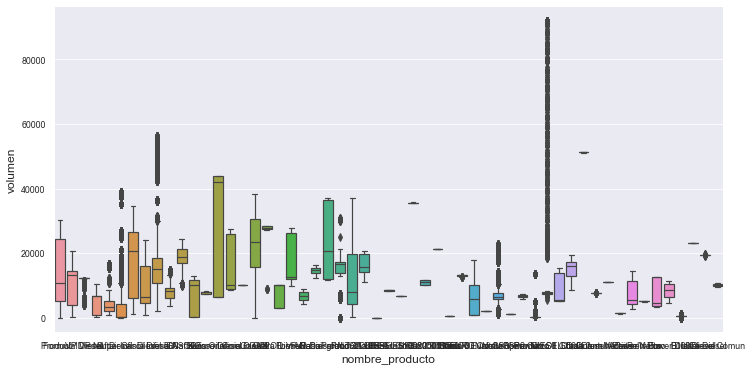

In [93]:
plt.figure(figsize=(12,6))#ver de agrupar productos
seaborn.boxplot(data=df, x="nombre_producto", y="volumen")

In [94]:
pd.crosstab(df.nombre_producto, df.industria)

industria,Agriculture,Construction,Industry,Mining,Oil&Gas,Public,Service Station,Telcos,Transportation
nombre_producto,,,,,,,,,
Aceite,0,0,0,0,0,0,0,0,101
B100,0,0,0,0,0,0,0,0,464
BIO,0,0,0,0,0,0,0,0,616
D500,0,0,0,0,0,0,1201,0,0
DIESEL,0,0,0,0,397,0,0,0,7700
DIESEL EURO,0,0,0,0,0,0,0,0,101
Diesel,467,183,0,0,95,0,861,8297,1599
Diesel 500,90,0,0,0,0,0,1248,0,8737
Diesel Comun,0,0,0,0,0,0,0,0,54


In [29]:
#df['id_tanque'].unique()

In [30]:
#grouped_history = df.groupby('id_tanque')
#grouped_history.get_group(1014).head()

In [31]:
#grouped_history.groups.keys()

In [32]:
#grouped_history.groups.values

In [33]:
#fig = plt.figure(figsize=(15, 7))
#seaborn.lineplot(
    #data=grouped_history.get_group(1014), 
   # y='volumen', 
    #x='timestamp' 
#)
#plt.ticklabel_format(style='plain', axis='y')
#seaborn.despine()

In [34]:
#grouped_history.get_group(1014).query('volumen < 0')

In [35]:
#grouped_history.get_group(1014)['volumen'].max(), grouped_history.get_group(1014)['volumen'].min()

In [36]:
#grouped_history.get_group(1014).iloc[0]['capacidad']

In [37]:
#df['id_tanque'].value_counts()

In [38]:
#variable = 102490
#df_filtered = df.query('id_tanque == @variable')

In [39]:
#df_filtered.head()


- Tanque
- Equipo
- Empresa

Agrupar 

In [40]:
#fig = plt.figure(figsize=(15, 7))
#seaborn.lineplot(
    #data=df_filtered, 
    #y='volumen', 
    #x='timestamp' 
#)
#plt.ticklabel_format(style='plain', axis='y')
#seaborn.despine()

In [41]:
#fig = plt.figure(figsize=(15, 7))
#seaborn.lineplot(
 #   data=df_filtered[:500], 
  #  y='volumen', 
 #   x='timestamp' 
#)
#plt.ticklabel_format(style='plain', axis='y')
#seaborn.despine()

In [42]:
2021-01-02 07:37:34

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (<ipython-input-42-d053865cd806>, line 1)

Práctico de análisis y visualización, que consistirá en racionalizar los datos involucrados en el dataset. 


Visualizar series temporales agregadas por diferentes objetos de agrupación. 
- Por tanque
- Por equipo
- Por industria


Tratamiento de outliers. 
- Ver aquellos datos que se salen de la media (porcentaje, intervalo de confianza?)
- tanques con pocos registros
- histograma del volumen
- volumen por encima de la capacidad
- Volumen negativo
- Tambien aplicar a temperatura y otras variables.
- Codigo - Ecos 0
- nulos tanque, volumen, temperatura, ver

Visualizar patrones de administración de inventarios por producto en centros operativos. 

- Para relacionar variables categóóricas: Ver que productos se usan máás respecto al segmento.
- Quéé variables va a afectar: volumen, altura, temperatura, boya de agua, capacidad, densidad.

Descubrir diferencias en los patrones de acuerdo al tipo de segmento. Estudio de teoría para análisis estadístico de series temporales. 
- 

Analizar la correlación de los patrones de consumo de acuerdo al segmento, infraestructura, producto, etc. 
- Ver correlaciones de todas las variables, ver equivalente en R. Lau

Analizar la matriz de correlación cruzada entre las diferentes features del dataset. 

Identificar los modelos probabilísticos mas adecuados para describir el comportamiento de consumo y los patrones de administración de inventarios. 

Probar test de hipótesis del modelo seleccionado como descriptor. 

Probar modelos parametrizados con features seleccionadas para estimar un inventario en un momento aleatorio en un centro operativo.


1. Ver de un rango que sea representativo, ir acotando, para ver variaciones. (dia-semana-mes).
2. Agregar distintos obj de agrupacion, ver si el patron es el mismo para varias agrupaciones


